<a href="https://colab.research.google.com/github/Kunal-code-u/svm-parameter-optimization/blob/main/Parameter_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


🔁 Optimizing Sample 1

🔁 Optimizing Sample 2

🔁 Optimizing Sample 3

🔁 Optimizing Sample 4

🔁 Optimizing Sample 5

🔁 Optimizing Sample 6

🔁 Optimizing Sample 7

🔁 Optimizing Sample 8

🔁 Optimizing Sample 9

🔁 Optimizing Sample 10

📊 Table 1: Best Accuracy and Parameters per Sample
Sample  Accuracy                                                   Parameters
    S1     92.97  {'C': 6.725268669500442, 'gamma': 'scale', 'kernel': 'rbf'}
    S2     92.83     {'C': 8.4169258900655, 'gamma': 'auto', 'kernel': 'rbf'}
    S3     93.54  {'C': 5.160868335126388, 'gamma': 'scale', 'kernel': 'rbf'}
    S4     92.58   {'C': 9.816026061735675, 'gamma': 'auto', 'kernel': 'rbf'}
    S5     92.80 {'C': 4.0324672836655555, 'gamma': 'scale', 'kernel': 'rbf'}
    S6     92.63  {'C': 9.976962859363766, 'gamma': 'scale', 'kernel': 'rbf'}
    S7     93.24   {'C': 7.340705674116883, 'gamma': 'auto', 'kernel': 'rbf'}
    S8     93.61   {'C': 4.495013131901203, 'gamma': 'auto', 'kernel': 'rbf'}
    S9     93.7

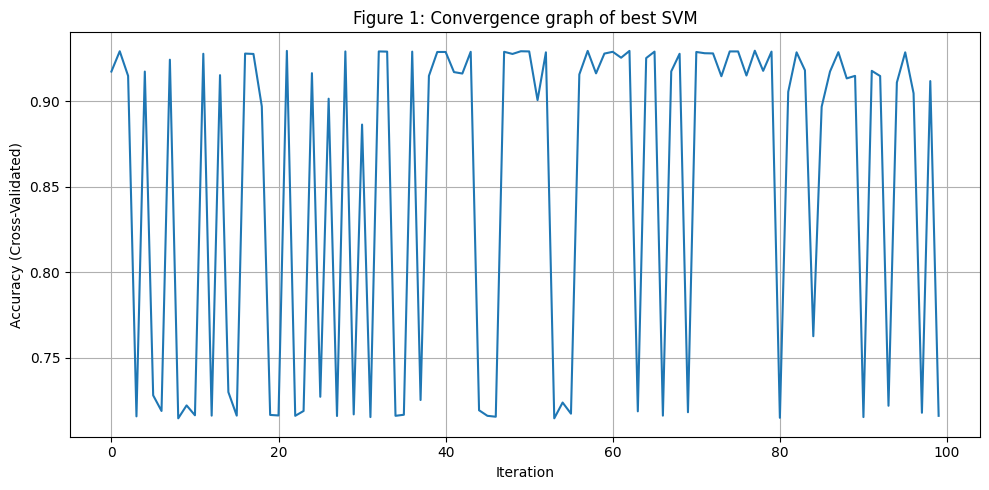

<Figure size 640x480 with 0 Axes>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from scipy.stats import uniform

df = pd.read_excel('Dry_Bean_Dataset.xlsx', engine='openpyxl')

# Step 2: Preprocessing
X = df.drop('Class', axis=1)
y = df['Class']

# Encode class labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Optimization Setup
param_dist = {
    'C': uniform(0.1, 10),
    'kernel': ['rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

results = []
convergence_all = {}
best_accuracies = []

# Step 4: Run for 10 different random samples
for i in range(10):
    print(f"\n🔁 Optimizing Sample {i+1}")
    X_shuff, y_shuff = shuffle(X_scaled, y_encoded, random_state=i)
    X_train, X_test, y_train, y_test = train_test_split(X_shuff, y_shuff, test_size=0.3, random_state=i)

    svc = SVC()
    random_search = RandomizedSearchCV(
        svc,
        param_distributions=param_dist,
        n_iter=100,
        scoring='accuracy',
        cv=3,
        random_state=i,
        verbose=0,
        n_jobs=-1,
        return_train_score=False
    )

    random_search.fit(X_train, y_train)
    best_model = random_search.best_estimator_

    y_pred = best_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    results.append({
        'Sample': f'S{i+1}',
        'Accuracy': round(acc * 100, 2),
        'Parameters': random_search.best_params_
    })

    best_accuracies.append(acc)
    convergence_all[f'S{i+1}'] = random_search.cv_results_['mean_test_score']

# Step 5: Display Results
print("\n📊 Table 1: Best Accuracy and Parameters per Sample")
results_df = pd.DataFrame(results)
results_df.to_csv("svm_results.csv",index=False)
print(results_df.to_string(index=False))

# Step 6: Plot Convergence for Best Sample
best_index = np.argmax(best_accuracies)
best_sample = f'S{best_index+1}'
print(f"\n🏆 Best Sample: {best_sample} with Accuracy = {best_accuracies[best_index]*100:.2f}%")

plt.figure(figsize=(10, 5))
plt.plot(convergence_all[best_sample])
plt.title("Figure 1: Convergence graph of best SVM")
plt.xlabel("Iteration")
plt.ylabel("Accuracy (Cross-Validated)")
plt.grid(True)
plt.tight_layout()
plt.savefig("best_svm_convergence.png")
plt.show()

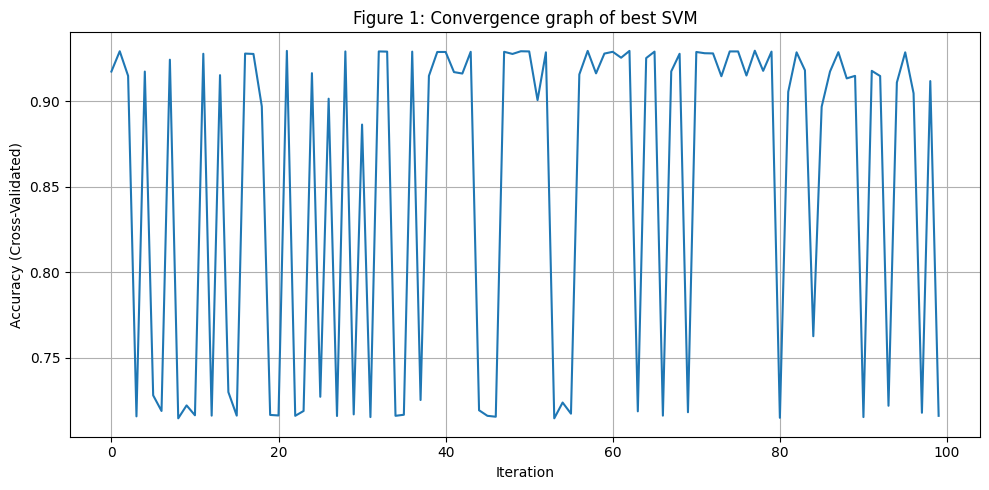

In [5]:
plt.figure(figsize=(10, 5))
plt.plot(convergence_all[best_sample])
plt.title("Figure 1: Convergence graph of best SVM")
plt.xlabel("Iteration")
plt.ylabel("Accuracy (Cross-Validated)")
plt.grid(True)
plt.tight_layout()

plt.savefig("best_svm_convergence.png")  # Save before showing
plt.show()
